In [601]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)


In [602]:
tweets = pd.read_csv('data/train.csv')
tweets.head(100)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
95,137,accident,Charlotte,9 Mile backup on I-77 South...accident blockin...,1
96,138,accident,"Baton Rouge, LA",Has an accident changed your life? We will hel...,0
97,139,accident,"Hagerstown, MD",#BREAKING: there was a deadly motorcycle car a...,1
98,141,accident,"Gloucestershire , UK",@flowri were you marinading it or was it an ac...,0


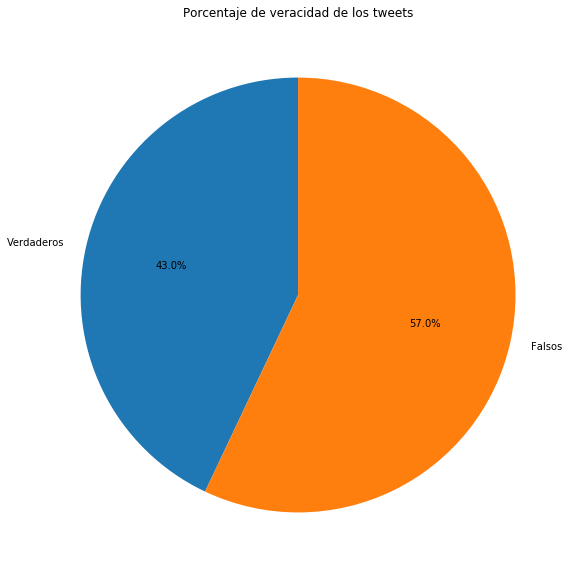

In [603]:
tweets_reales_count = tweets[tweets['target'] == 1]['target'].count()
tweets_falsos_count = tweets[tweets['target'] == 0]['target'].count()
grafico = plt.pie([tweets_reales_count, tweets_falsos_count],labels=['Verdaderos', 'Falsos'], startangle=90, autopct='%1.1f%%')
plt.title("Porcentaje de veracidad de los tweets")
plt.show(grafico)

In [604]:
tweets['text_size'] = tweets['text'].apply(len)
tweets['mencion'] = tweets['text'].str.contains('@').astype(int)
tweets['hashtag'] = tweets['text'].str.contains('#').astype(int)
tweets['url'] = tweets['text'].str.contains('http').astype(int)
tweets.head()

,id,keyword,location,text,target,text_size,mencion,hashtag,url
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,0,1,0
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,0,0,0
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,0,0,0
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,0,1,0
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,0,1,0


In [616]:
cant_verdaderos = tweets[tweets['target'] == 1]['target'].count()
cant_falsos = tweets[tweets['target'] == 0]['target'].count()
tweets_red = tweets[['target', 'mencion', 'hashtag', 'url']]
plotdata = tweets_red.groupby('target').agg({'url': 'sum', 'mencion':  'sum', 'hashtag': 'sum'})
plotdata.columns = ['Contiene URL(http)', 'Contiene mención(@user)', 'Contiene Hashtag(#)']
plotdata = plotdata.transpose()
plotdata[0] = plotdata[0]*100/cant_falsos
plotdata[1] = plotdata[1]*100/cant_verdaderos
plotdata.columns = ['Tweets falsos', 'tweets verdaderos']
plotdata = plotdata[plotdata.columns[::-1]] #Cambio el orden de las columnas


Text(0, 0.5, 'Porcentaje(%)')

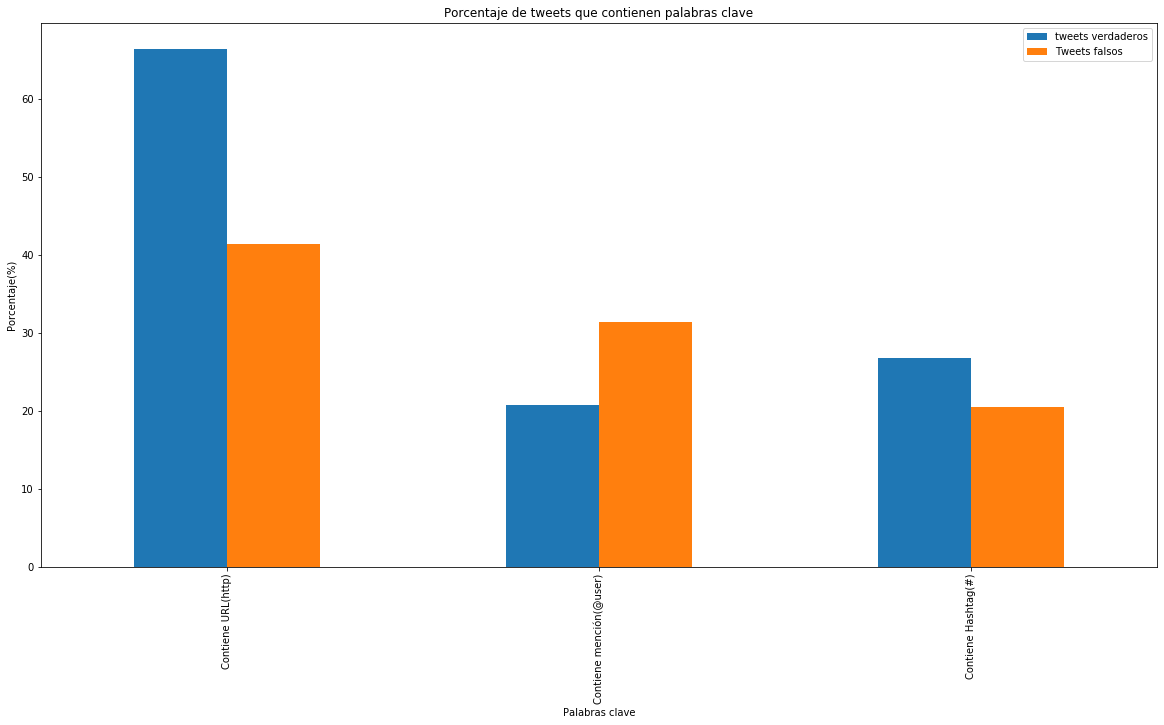

In [622]:
plotdata.plot(kind="bar", stacked=False)
plt.title("Porcentaje de tweets que contienen palabras clave")
plt.xlabel("Palabras clave")
plt.ylabel("Porcentaje(%)")


In [618]:
tweets_reales = tweets[tweets['target'] == 1]
tweets_reales.head()

,id,keyword,location,text,target,text_size,mencion,hashtag,url
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,0,1,0
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,0,0,0
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,0,0,0
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,0,1,0
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,0,1,0


In [619]:
tweets_falsos = tweets[tweets['target'] == 0]
tweets_falsos.head()

,id,keyword,location,text,target,text_size,mencion,hashtag,url
15,23,NaN,NaN,What's up man?,0,14,0,0,0
16,24,NaN,NaN,I love fruits,0,13,0,0,0
17,25,NaN,NaN,Summer is lovely,0,16,0,0,0
18,26,NaN,NaN,My car is so fast,0,17,0,0,0
19,28,NaN,NaN,What a goooooooaaaaaal!!!!!!,0,28,0,0,0


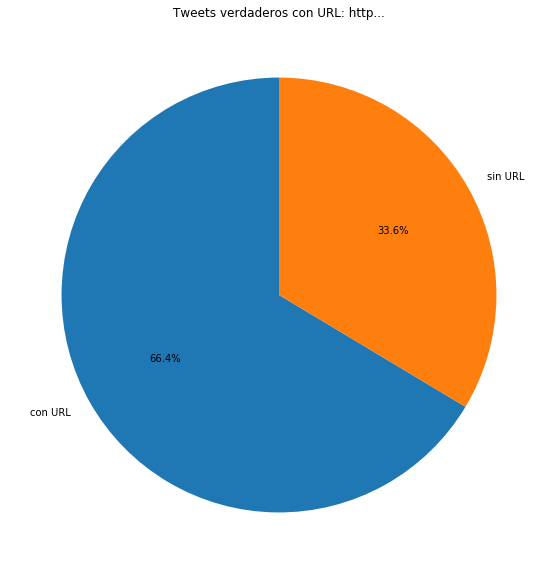

In [620]:
tw_reales_con_link = tweets_reales[tweets_reales['url'] == True]['url'].count()
tw_reales_sin_link = tweets_reales[tweets_reales['url'] == False]['url'].count()
grafico = plt.pie([tw_reales_con_link, tw_reales_sin_link],labels=['con URL', 'sin URL'], startangle=90, autopct='%1.1f%%')
plt.title("Tweets verdaderos con URL: http...")
plt.show(grafico)

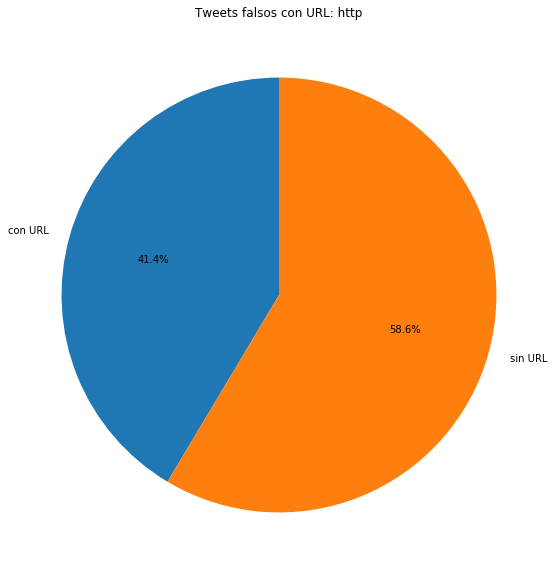

In [621]:
tw_falsos_con_link = tweets_falsos[tweets_falsos['url'] == True]['url'].count()
tw_falsos_sin_link = tweets_falsos[tweets_falsos['url'] == False]['url'].count()
grafico = plt.pie([tw_falsos_con_link, tw_falsos_sin_link],labels=['con URL', 'sin URL'], startangle=90, autopct='%1.1f%%')
plt.title("Tweets falsos con URL: http")
plt.show(grafico)